Author: Divya 

In [1]:
# Load necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl

# Visualization modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data-processing modules 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Modeling and evaluation modules 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Module for saving model
import pickle 

# Set seed for reproducibility 
SEED = 42

In [2]:
# Load dataset 
df = pd.read_csv("df_new.csv")
df.head()

,Unnamed: 0,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,...,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CC,CM,quartile1,quartile2,quartile3,quartile4
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,...,0,0,1,0,0,1,1,0,0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28,...,0,0,1,0,0,1,1,0,0,0
2,2,1,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00,...,0,0,0,1,1,0,1,0,0,0
3,3,1,181.00,181.0,0.00,21182.0,0.0,1,0.0,21363.00,...,1,0,0,0,1,0,1,0,0,0
4,4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0.0,11668.14,...,0,0,1,0,0,1,1,0,0,0


In [3]:
# Drop unnecessary column and step (since we already create "day" from step)
df.drop([df.columns[0],'step'],axis = 1,inplace = True)
df.head()

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,day,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,CC,CM,quartile1,quartile2,quartile3,quartile4
0,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,0,0,0,0,1,0,0,1,1,0,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28,0,0,0,0,1,0,0,1,1,0,0,0
2,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00,0,0,0,0,0,1,1,0,1,0,0,0
3,181.00,181.0,0.00,21182.0,0.0,1,0.0,21363.00,0,0,1,0,0,0,1,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0.0,11668.14,0,0,0,0,1,0,0,1,1,0,0,0


In [4]:
# Create X and y object 
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']
# Verify shape
print(X.shape)
print(y.shape)

(6362620, 19)
(6362620,)


In [68]:
# Split into train and test data, randome_state = SEED for reproducibility
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify = y, random_state = SEED)
# Verify shape for train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5090096, 19)
(5090096,)
(1272524, 19)
(1272524,)


In [6]:
from collections import Counter
# Summarize class distribution
counter1 = Counter(y_train)
print(counter1)

Counter({0: 5083526, 1: 6570})


In [7]:
counter2 = Counter(y_test)
print(counter2)

Counter({0: 1270881, 1: 1643})


We can see the 2 classes are very imbalanced. 

In [69]:
# Normalization: Fit minmax scaler on X_train data and transform both X_train and X_test data  
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
print(X_test_scaled.shape)

(1272524, 19)


## Logistic Regression Base Model 

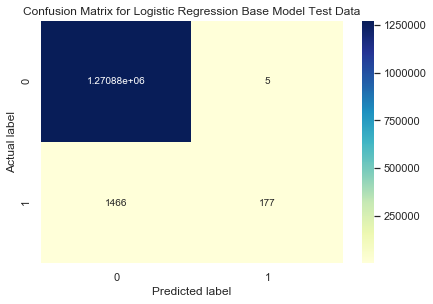

In [9]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression instance 
log_reg = LogisticRegression(random_state=SEED)
# Fit on X_train and y_train
log_reg.fit(X_train_scaled, y_train)
# Predict test data 
y_pred = log_reg.predict(X_test_scaled)

# Generate confusion matrix and classification report 
cnf_test = metrics.confusion_matrix(y_test, y_pred)
clr_test = metrics.classification_report(y_test, y_pred)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_test, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression Base Model Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [10]:
# Print classification report
print(clr_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.11      0.19      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.55      0.60   1272524
weighted avg       1.00      1.00      1.00   1272524



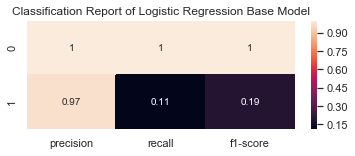

In [11]:
# Save classification report for presentation 
clf_report1 = metrics.classification_report(y_test, y_pred, output_dict=True)
df1 = pd.DataFrame(clf_report1).iloc[:-1, :2].T

fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df1, annot=True)
plt.title("Classification Report of Logistic Regression Base Model")
ax.set_ylim(len(df1)+0, -0)
fig.savefig("lg_base", bbox_inches = 'tight')
plt.show()

In [12]:
# Calculate predicted probabilities 
probs = log_reg.predict_proba(X_test_scaled)
# Calculate roc_auc_score for class 1 
roc_auc_test = metrics.roc_auc_score(y_test, probs[:,1])
print(roc_auc_test)

0.9402175284845834


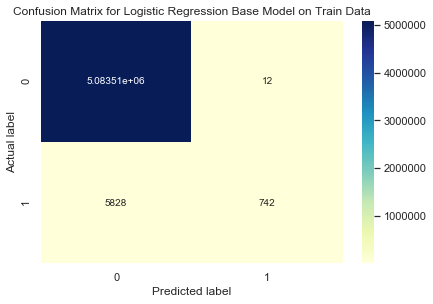

In [13]:
# Predict train data 
y_pred_train = log_reg.predict(X_train_scaled)

# Generate confusion matrix
cnf_train = metrics.confusion_matrix(y_train, y_pred_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_train, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression Base Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [14]:
# Generate classification report 
clr_train = metrics.classification_report(y_train, y_pred_train)
print(clr_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083526
           1       0.98      0.11      0.20      6570

    accuracy                           1.00   5090096
   macro avg       0.99      0.56      0.60   5090096
weighted avg       1.00      1.00      1.00   5090096



In [15]:
# Calculate predicted probability 
train_probs = log_reg.predict_proba(X_train_scaled)
# Calculate roc_auc_score for class 1 
roc_auc_train = metrics.roc_auc_score(y_train, train_probs[:,1])
print(roc_auc_train)

0.9411876037699647


Results suggest that there is no overfitting with the logistic regression base model as the classification reports of the train and test sets suggest very similar performance. However, we can see very poor performance of the model on class 1 (especially the low recall), which is caused by the significant imbalance between the two classes. Therefore, we need to employ weighted logistic regression and oversampling techniques to account for such imbalance. 

## Weighted Logistic Regression 

In [16]:
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weighting
weighting = compute_class_weight('balanced', [0,1], y)
print(weighting)

[  0.50064624 387.35054182]


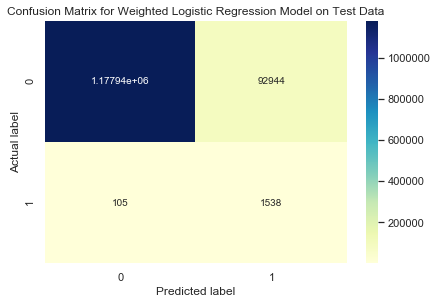

In [17]:
# Define model
weights = {0:weighting[0], 1:weighting[1]}
# Create a logistic regression instance with class weights 
wlr = LogisticRegression(class_weight=weights, random_state=SEED)
# Fit on X_train and y_train
wlr.fit(X_train_scaled, y_train)
# Predict test data 
y_pred_wlr = wlr.predict(X_test_scaled)

# Generate confusion matrix and classification report 
cnf_test_wlr = metrics.confusion_matrix(y_test, y_pred_wlr)
clr_test_wlr = metrics.classification_report(y_test, y_pred_wlr)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_test_wlr, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Weighted Logistic Regression Model on Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [18]:
# Print classification report
print(clr_test_wlr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1270881
           1       0.02      0.94      0.03      1643

    accuracy                           0.93   1272524
   macro avg       0.51      0.93      0.50   1272524
weighted avg       1.00      0.93      0.96   1272524



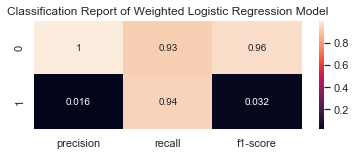

In [19]:
# Save classification report for presentation 
clf_report2 = metrics.classification_report(y_test, y_pred_wlr, output_dict=True)
df2 = pd.DataFrame(clf_report2).iloc[:-1, :2].T

fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df2, annot=True)
plt.title("Classification Report of Weighted Logistic Regression Model")
ax.set_ylim(len(df2)+0, -0)
fig.savefig("weighted_lg", bbox_inches = 'tight')
plt.show()

In [20]:
# Calculate predicted probabilities 
wlr_probs = wlr.predict_proba(X_test_scaled)
# Calculate roc_auc_score for class 1 
roc_auc_test_wlr = metrics.roc_auc_score(y_test, wlr_probs[:,1])
print(roc_auc_test_wlr)

0.9858719392353051


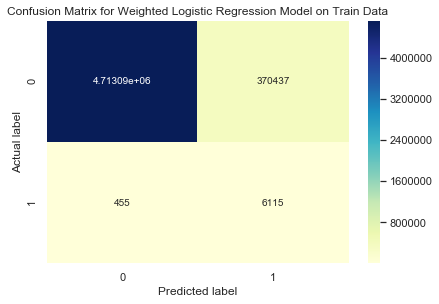

In [21]:
# Predict train data 
y_pred_wlr_train = wlr.predict(X_train_scaled)

# Generate confusion matrix
cnf_train_wlr = metrics.confusion_matrix(y_train, y_pred_wlr_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_train_wlr, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Weighted Logistic Regression Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [22]:
# Generate classification report 
clr_wlr_train = metrics.classification_report(y_train, y_pred_wlr_train)
print(clr_wlr_train)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   5083526
           1       0.02      0.93      0.03      6570

    accuracy                           0.93   5090096
   macro avg       0.51      0.93      0.50   5090096
weighted avg       1.00      0.93      0.96   5090096



In [23]:
# Calculate predicted probability 
wlr_train_probs = wlr.predict_proba(X_train_scaled)
# Calculate roc_auc_score for class 1 
roc_auc_train_wlr = metrics.roc_auc_score(y_train, wlr_train_probs[:,1])
print(roc_auc_train_wlr)

0.9846513326641242


There's no signs of overfitting since the roc-auc score and classification reports on the train and test data are very similar. Compared to the logistic regression base model, we can see significant improvements in the recall for class 1, which represents the proportion of true positives (frauds) out of the actual positives (frauds). The recall is an important metric for our evaluation because our model aims to correctly identify as many fraud cases as possible. We also see an increase in the roc-auc score, again suggesting that the weighted model perform better. 

## Weighted Logistic Regression + Grid Search

In [24]:
# Define grid
balance = [{0:1,1:10}, {0:1,1:100}, {0:1,1:500}, {0:1,1:800}, {0:1,1:1000}, {0:1,1:1200}]
param_grid = {"class_weight": balance}

# Create a logistic regression instance
lr_obj = LogisticRegression(random_state = SEED)

# Create grid search object with various combinations of parameters
lr_Grid = GridSearchCV(lr_obj, param_grid, cv = 5, scoring = 'recall',refit = True, n_jobs=-1, verbose = 0)

# Fit the grid search model on training data 
lr_Grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 10}, {0: 1, 1: 100},
                                          {0: 1, 1: 500}, {0: 1, 1: 800},
                                          {0: 1, 1: 1000}, {0: 1, 1: 1200}]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [25]:
# Identify the best model from my grid search 
best_wlr = lr_Grid.best_estimator_
best_wlr

LogisticRegression(C=1.0, class_weight={0: 1, 1: 1200}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

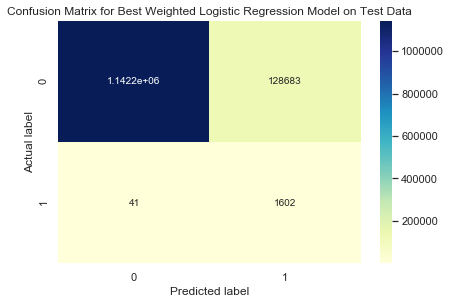

In [26]:
# Predict test data 
y_pred_best_wlr = best_wlr.predict(X_test_scaled)

# Generate confusion matrix and classification report 
cnf_test_best_wlr = metrics.confusion_matrix(y_test, y_pred_best_wlr)
clr_test_best_wlr = metrics.classification_report(y_test, y_pred_best_wlr)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_test_best_wlr, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best Weighted Logistic Regression Model on Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [27]:
# Print classification report
print(clr_test_best_wlr)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270881
           1       0.01      0.98      0.02      1643

    accuracy                           0.90   1272524
   macro avg       0.51      0.94      0.49   1272524
weighted avg       1.00      0.90      0.95   1272524



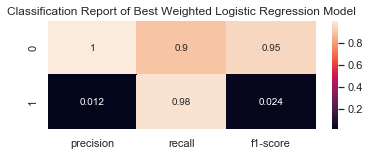

In [28]:
# Save classification report for presentation 
clf_report3 = metrics.classification_report(y_test, y_pred_best_wlr, output_dict=True)
df3 = pd.DataFrame(clf_report3).iloc[:-1, :2].T

fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df3, annot=True)
plt.title("Classification Report of Best Weighted Logistic Regression Model")
ax.set_ylim(len(df3)+0, -0)
fig.savefig("best_wlr", bbox_inches = 'tight')
plt.show()

In [29]:
# Calculate predicted probabilities 
best_wlr_probs = best_wlr.predict_proba(X_test_scaled)
# Calculate roc_auc_score for class 1 
roc_auc_best_wlr = metrics.roc_auc_score(y_test, best_wlr_probs[:,1])
print(roc_auc_best_wlr)

0.9863899987278272


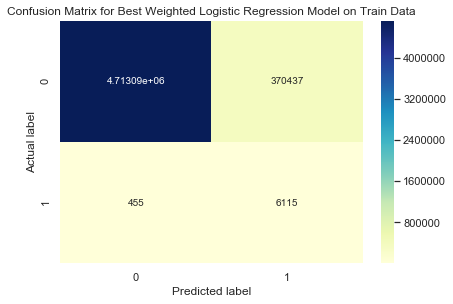

In [30]:
# Predict train data 
y_pred_best_wlr_train = best_wlr.predict(X_train_scaled)

# Generate confusion matrix
cnf_train_best_wlr = metrics.confusion_matrix(y_train, y_pred_wlr_train)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_train_best_wlr, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Best Weighted Logistic Regression Model on Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [31]:
# Generate classification report 
clr_best_wlr_train = metrics.classification_report(y_train, y_pred_best_wlr_train)
print(clr_best_wlr_train)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95   5083526
           1       0.01      0.97      0.02      6570

    accuracy                           0.90   5090096
   macro avg       0.51      0.94      0.49   5090096
weighted avg       1.00      0.90      0.95   5090096



In [32]:
# Calculate predicted probability 
best_wlr_train_probs = best_wlr.predict_proba(X_train_scaled)
# Calculate roc_auc_score for class 1 
roc_auc_train_best_wlr = metrics.roc_auc_score(y_train, best_wlr_train_probs[:,1])
print(roc_auc_train_best_wlr)

0.9853651884583321


There's no signs of overfitting since the roc-auc score and classification reports on the train and test data are very similar. Compared to the previous weighted logistic regression model (where class weights are based on ratio between the two classes), we see small improvement in model performance as the recall for class 1 increases slightly. 

## Logistic Regression with Over-Sampling 

In [33]:
from imblearn.over_sampling import ADASYN
# Use ADASYN to create synthetic training data of the minority class 
adasyn = ADASYN(random_state = SEED, sampling_strategy = 1.0)
X_train_res, y_train_res = adasyn.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Using TensorFlow backend.


Resampled dataset shape Counter({0: 5083526, 1: 5083026})


In [34]:
print(X_train_res.shape)
print(y_train_res.shape)

(10166552, 19)
(10166552,)


In [43]:
print('Test data shape %s' % Counter(y_test))

Test data shape Counter({0: 1270881, 1: 1643})


The test set was not transformed by ADASYN and we can see the significant imbalance between the 2 classes. 

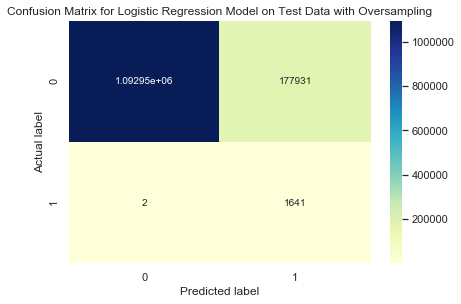

In [100]:
# Create a logistic regression instance 
lg = LogisticRegression(random_state=SEED)
# Fit on X_train and y_train
lg.fit(X_train_res, y_train_res)
# Predict test data 
y_pred_res = lg.predict(X_test_scaled)

# Generate confusion matrix and classification report 
cnf_test_res = metrics.confusion_matrix(y_test, y_pred_res)
clr_test_res = metrics.classification_report(y_test, y_pred_res)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_test_res, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression Model on Test Data with Oversampling', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig("cnf_lg_ada", bbox_inches = 'tight')
plt.show()

1641 out of the 1643 fraud cases were successfully classified, thus we have a very high recall as shown in the classification report.

In [36]:
# Print classification report
print(clr_test_res)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92   1270881
           1       0.01      1.00      0.02      1643

    accuracy                           0.86   1272524
   macro avg       0.50      0.93      0.47   1272524
weighted avg       1.00      0.86      0.92   1272524



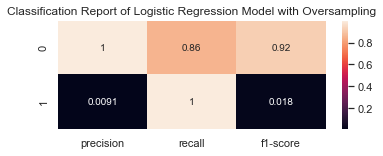

In [37]:
# Save classification report for presentation 
clf_report4 = metrics.classification_report(y_test, y_pred_res, output_dict=True)
df4 = pd.DataFrame(clf_report4).iloc[:-1, :2].T

fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df4, annot=True)
plt.title("Classification Report of Logistic Regression Model with Oversampling")
ax.set_ylim(len(df4)+0, -0)
fig.savefig("lg_with_oversampling", bbox_inches = 'tight')
plt.show()

In [38]:
# Calculate predicted probabilities 
probs_res = lg.predict_proba(X_test_scaled)
# Calculate roc_auc_score for class 1 
roc_auc_test_res = metrics.roc_auc_score(y_test, probs_res[:,1])
print(roc_auc_test_res)

0.9881078489446931


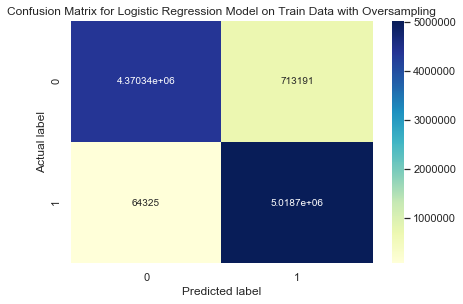

In [39]:
# Predict train data 
y_pred_train_res = lg.predict(X_train_res)

# Generate confusion matrix
cnf_train_res = metrics.confusion_matrix(y_train_res, y_pred_train_res)

# Create Heatmap for Confusion Matrix 
sns.heatmap(cnf_train_res, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression Model on Train Data with Oversampling', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [40]:
# Generate classification report 
clr_train_res = metrics.classification_report(y_train_res, y_pred_train_res)
print(clr_train_res)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92   5083526
           1       0.88      0.99      0.93   5083026

    accuracy                           0.92  10166552
   macro avg       0.93      0.92      0.92  10166552
weighted avg       0.93      0.92      0.92  10166552



In [41]:
# Calculate predicted probability 
res_train_probs = lg.predict_proba(X_train_res)
# Calculate roc_auc_score for class 1 
roc_auc_train_res = metrics.roc_auc_score(y_train_res, res_train_probs[:,1])
print(roc_auc_train_res)

0.9731222626809285


Comparing the roc_auc score and the classification report between the train and test datasets, no overfitting is found. The roc-auc scores are very close to one another, and the recall for the 2 classes are also similar. The low precision and recall for class 1 in the test data is due to the almost perfect recall, as only 2 fraud cases were missed. 

In this model, ADASYN was used as an oversampling technique to achieve class balance. ADASYN was chosen here as it is an improved version of SMOTE. What it does is same as SMOTE just with a minor improvement. After creating the synthetic sample, it adds random small values to the data points to make them more realistic. In other words, instead of all the samples being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered. From the results, we can see that with oversampling, the logistic regression model performs really well on both the train and test data. Since the classes are balanced, we see very high precision and recall for both classes, in addition to the 0.96 accuracy and 0.99 roc-auc score.  

In [47]:
# Convert from numpy array to pandas dataframe
X_train_ada = pd.DataFrame(X_train_res)

In [53]:
# Rename y_train_res 
y_train_res.rename("isFraud")

0           0
1           0
2           0
3           0
4           0
           ..
10166547    1
10166548    1
10166549    1
10166550    1
10166551    1
Name: isFraud, Length: 10166552, dtype: int64

In [54]:
# Merge the resampled X_train and y_train data 
resampled_train = pd.concat([X_train_ada, y_train_res], axis=1, join='inner')
resampled_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,isFraud
0,0.000107,0.000743,0.000692,0.000000,0.000000,1.081718e-10,0.852023,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,0.000074,0.000000,0.000000,0.000000,0.000000,7.414681e-05,0.851989,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,0.003907,0.000000,0.000000,0.001376,0.002389,3.907294e-03,0.851912,0.300000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.000077,0.000000,0.000000,0.000000,0.000000,7.662373e-05,0.851991,0.300000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0.002358,0.218942,0.267494,0.006848,0.006233,4.716714e-03,0.856807,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [55]:
resampled_train.shape

(10166552, 20)

In [56]:
# Save dataset after oversampling
resampled_train.to_csv('resampled_train_data.csv', index = False)

In [81]:
y_test.shape

(1272524,)

In [85]:
X_test_scaled.shape

(1272524, 19)

In [79]:
# Convert from numpy array to pandas dataframe
X_test_saved = pd.DataFrame(X_test_scaled)
X_test_saved

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.009634,0.000004,0.000000,0.000000,0.002500,0.009631,0.851912,0.400000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.001057,0.035181,0.044247,0.000899,0.000624,0.002114,0.854106,0.533333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000064,0.000005,0.000000,0.000000,0.000000,0.000060,0.851978,0.966667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.002030,0.000186,0.000000,0.005051,0.005575,0.001911,0.851912,0.233333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.000894,0.000000,0.000000,0.002943,0.003174,0.000894,0.851912,0.433333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272519,0.001515,0.000088,0.000000,0.000778,0.001170,0.001458,0.851912,0.433333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1272520,0.002951,0.000000,0.000000,0.004173,0.004937,0.002951,0.851912,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1272521,0.001468,0.000357,0.003165,0.001408,0.001027,0.002935,0.854958,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1272522,0.001562,0.000000,0.000000,0.005273,0.005676,0.001562,0.851912,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [86]:
X_test_saved.shape

(1272524, 19)

In [92]:
y_test

4051353    0
5746321    0
6361797    0
2247309    0
4692207    0
          ..
4586779    0
5202249    0
5274477    0
479091     0
2496743    0
Name: isFraud, Length: 1272524, dtype: int64

In [94]:
# Since the test dataset doesn't need to be over sampled, we will save the test data and retrieve later. 
test_dat = pd.concat([X_test_saved.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1, join='inner')
print(test_dat.shape)
test_dat.head()

(1272524, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,isFraud
0,0.009634,0.000004,0.000000,0.000000,0.002500,0.009631,0.851912,0.400000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.001057,0.035181,0.044247,0.000899,0.000624,0.002114,0.854106,0.533333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0.000064,0.000005,0.000000,0.000000,0.000000,0.000060,0.851978,0.966667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,0.002030,0.000186,0.000000,0.005051,0.005575,0.001911,0.851912,0.233333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.000894,0.000000,0.000000,0.002943,0.003174,0.000894,0.851912,0.433333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [96]:
# Save scaled(normalized) test data 
test_dat.to_csv('test_data.csv', index = False)